In [1]:
import numpy as np
import pandas as pd

In [97]:
results_file = r"C:\Users\giusy\OneDrive\Desktop\AI_Healtcare\IMU-compensatory-movement-detection\Data\Models\model_results_summary.csv"

In [98]:
results = pd.read_csv(results_file)

In [104]:
results_window = results[results["window_size"] == "1000"]
results_window[results_window["model_name"] == "XGBoost"]

,f1_macro,accuracy,precision_macro,recall_macro,roc_auc,f1_macro_mean,f1_macro_lower,f1_macro_upper,accuracy_mean,accuracy_lower,...,recall_macro_mean,recall_macro_lower,recall_macro_upper,roc_auc_mean,roc_auc_lower,roc_auc_upper,window_size,task,model_name,best_params
4,0.531508,0.538813,0.531522,0.532459,0.732721,0.531508,0.531508,0.531508,0.538813,0.538813,...,0.532459,0.532459,0.532459,0.732721,0.732721,0.732721,1000,cup-placing,XGBoost,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
11,0.587980,0.610603,0.655606,0.610693,0.702066,0.587980,0.587980,0.587980,0.610603,0.610603,...,0.610693,0.610693,0.610693,0.702066,0.702066,0.702066,1000,peg,XGBoost,"{'learning_rate': 0.01, 'max_depth': 3, 'n_est..."
18,0.694147,0.695906,0.708518,0.691443,0.795737,0.694147,0.694147,0.694147,0.695906,0.695906,...,0.691443,0.691443,0.691443,0.795737,0.795737,0.795737,1000,wiping,XGBoost,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
25,0.419328,0.442822,0.431586,0.445020,0.621635,0.419328,0.419328,0.419328,0.442822,0.442822,...,0.445020,0.445020,0.445020,0.621635,0.621635,0.621635,1000,pouring,XGBoost,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est..."
142,0.526288,0.533981,0.531739,0.531481,0.703619,0.526288,0.526288,0.526288,0.533981,0.533981,...,0.531481,0.531481,0.531481,0.703619,0.703619,0.703619,1000,all_tasks,XGBoost,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


In [90]:
results_window

,f1_macro,accuracy,precision_macro,recall_macro,roc_auc,f1_macro_mean,f1_macro_lower,f1_macro_upper,accuracy_mean,accuracy_lower,...,recall_macro_mean,recall_macro_lower,recall_macro_upper,roc_auc_mean,roc_auc_lower,roc_auc_upper,window_size,task,model_name,best_params


In [67]:
# Aggregate according to  model name and window size
df_grouped = results.groupby(['model_name', 'window_size'])

In [79]:
df_summary = pd.DataFrame()

In [80]:
for group in df_grouped:
    model_name = group[0][0]
    window_size = group[0][1]
    df_group = group[1]

    df_tmp = pd.DataFrame()
    # Compute average metrics across 4 tasks
    means = df_group[["f1_macro", "accuracy", "precision_macro", "recall_macro"]].mean()
    stds = df_group[["f1_macro", "accuracy", "precision_macro", "recall_macro"]].std()

    df_tmp['model_name']    = [model_name]
    df_tmp['window_size']   = [window_size]
    df_tmp['f1_macro_mean'] = [means['f1_macro']]
    df_tmp['f1_macro_std']  = [stds['f1_macro']]
    df_tmp['accuracy_mean'] = [means['accuracy']]
    df_tmp['accuracy_std']  = [stds['accuracy']]
    df_tmp['precision_macro_mean'] = [means['precision_macro']]
    df_tmp['precision_macro_std']  = [stds['precision_macro']]
    df_tmp['recall_macro_mean'] = [means['recall_macro']]
    df_tmp['recall_macro_std']  = [stds['recall_macro']]
    df_tmp['params'] = df_group['best_params'].iloc[0]  # assuming same params for the group
    # check if params are unique in the group
    unique_params = df_group['best_params'].nunique()
    if unique_params > 1:
        print(f"Warning: Multiple parameter sets found for model {model_name} with window size {window_size}.")
        print(df_group['best_params'].unique())
    df_summary = pd.concat([df_summary, df_tmp], ignore_index=True)

    

["{'n_neighbors': 5, 'weights': 'distance'}"
 "{'n_neighbors': 3, 'weights': 'distance'}"
 "{'n_neighbors': 3, 'weights': 'uniform'}"]
["{'n_neighbors': 5, 'weights': 'uniform'}"
 "{'n_neighbors': 3, 'weights': 'distance'}"]
["{'n_neighbors': 5, 'weights': 'uniform'}"
 "{'n_neighbors': 5, 'weights': 'distance'}"
 "{'n_neighbors': 3, 'weights': 'distance'}"]
["{'n_neighbors': 5, 'weights': 'uniform'}"
 "{'n_neighbors': 5, 'weights': 'distance'}"]
["{'n_neighbors': 3, 'weights': 'uniform'}"
 "{'n_neighbors': 3, 'weights': 'distance'}"
 "{'n_neighbors': 5, 'weights': 'distance'}"]
["{'C': 0.1}" "{'C': 1}"]
["{'C': 0.01}" "{'C': 0.1}"]
["{'C': 0.1}" "{'C': 0.01}" "{'C': 1}"]
["{'C': 0.1}" "{'C': 0.01}" "{'C': 1}"]
["{'C': 10}" "{'C': 1}"]
["{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}"
 "{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200}"
 "{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}"
 "{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}"]

In [82]:
df_summary[df_summary["window_size"] == "1000"].sort_values("accuracy_mean", ascending=False)

,model_name,window_size,f1_macro_mean,f1_macro_std,accuracy_mean,accuracy_std,precision_macro_mean,precision_macro_std,recall_macro_mean,recall_macro_std,params
5,LASSO_LR,1000,0.651743,0.053288,0.656034,0.056301,0.665878,0.064756,0.653290,0.055120,{'C': 0.1}
15,MLP,1000,0.594716,0.074954,0.598133,0.075055,0.605057,0.067997,0.594646,0.073521,"{'activation': 'relu', 'hidden_layer_sizes': (..."
25,SVM,1000,0.567736,0.061643,0.579255,0.055484,0.589400,0.051260,0.575069,0.055088,"{'C': 1, 'kernel': 'rbf'}"
20,RF,1000,0.558494,0.057414,0.573790,0.062613,0.571403,0.055498,0.570493,0.060408,"{'max_depth': None, 'n_estimators': 200}"
30,XGBoost,1000,0.558241,0.114552,0.572036,0.107442,0.581808,0.124629,0.569904,0.105568,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
0,KNN,1000,0.546140,0.074476,0.554775,0.069902,0.569697,0.069564,0.551372,0.068382,"{'n_neighbors': 5, 'weights': 'distance'}"
10,LightGBM,1000,0.524318,0.080416,0.533661,0.076208,0.531467,0.077911,0.528695,0.077490,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_metrics_vs_window(df_summary):
    df = df_summary.copy()

    # Make a clean string version of window_size
    df["window_size_str"] = df["window_size"].astype(str)

    # Try to parse numeric window sizes; non-numeric become NaN
    numeric_ws = pd.to_numeric(df["window_size_str"], errors="coerce")

    # Identify numeric vs non-numeric
    numeric_mask = ~numeric_ws.isna()

    if not numeric_mask.any():
        raise ValueError("No numeric window sizes found.")

    # Numeric positions = actual window sizes
    df.loc[numeric_mask, "window_pos"] = numeric_ws[numeric_mask]

    # Largest numeric window size
    max_ws = numeric_ws[numeric_mask].max()

    # Non-numeric (e.g., 'nowin', 'no win', etc.) → plot after max_ws
    offset = max_ws * 0.1 if max_ws > 0 else 1.0
    df.loc[~numeric_mask, "window_pos"] = max_ws + offset

    # Normalize label for non-numeric entries to "nowin"
    df.loc[~numeric_mask, "window_size_str"] = "nowin"

    # Prepare tick positions and labels (sorted)
    tick_info = (
        df[["window_pos", "window_size_str"]]
        .drop_duplicates()
        .sort_values("window_pos")
    )
    xticks = tick_info["window_pos"].values
    xtick_labels = []
    for lbl in tick_info["window_size_str"].values:
        if lbl == "nowin":
            xtick_labels.append("all")
        else:
            # show integer labels for numeric window sizes
            xtick_labels.append(str(int(float(lbl))))

    metrics = [
        ("f1_macro_mean",       "f1_macro_std",       "F1-macro"),
        ("accuracy_mean",       "accuracy_std",       "Accuracy"),
        ("precision_macro_mean","precision_macro_std","Precision-macro"),
        ("recall_macro_mean",   "recall_macro_std",   "Recall-macro"),
    ]

    models = df["model_name"].unique()

    fig, axes = plt.subplots(1, 4, figsize=(20, 10), sharex=True, sharey=True)
    for ax, (m_mean, m_std, title) in zip(axes, metrics):
        for model in models:
            df_m = df[df["model_name"] == model].sort_values("window_pos")
            x = df_m["window_pos"].values
            y = df_m[m_mean].values
            yerr = df_m[m_std].values

            ax.errorbar(
                x, y, yerr=yerr,
                marker="o",
                linestyle="-",
                capsize=3,
                label=model,
            )

        ax.set_title(title)
        ax.set_xlabel("Window size (ms)")
        ax.set_ylabel("Score")
        ax.grid(True, linestyle=":", linewidth=0.5)

        ax.set_xticks(xticks)
        ax.set_xticklabels(xtick_labels)

    # Shared legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(
        handles, labels,
        loc="upper center",
        bbox_to_anchor=(0.5, 1.05),
        ncol=len(models),
        frameon=False,
    )

    plt.tight_layout()
    plt.show()


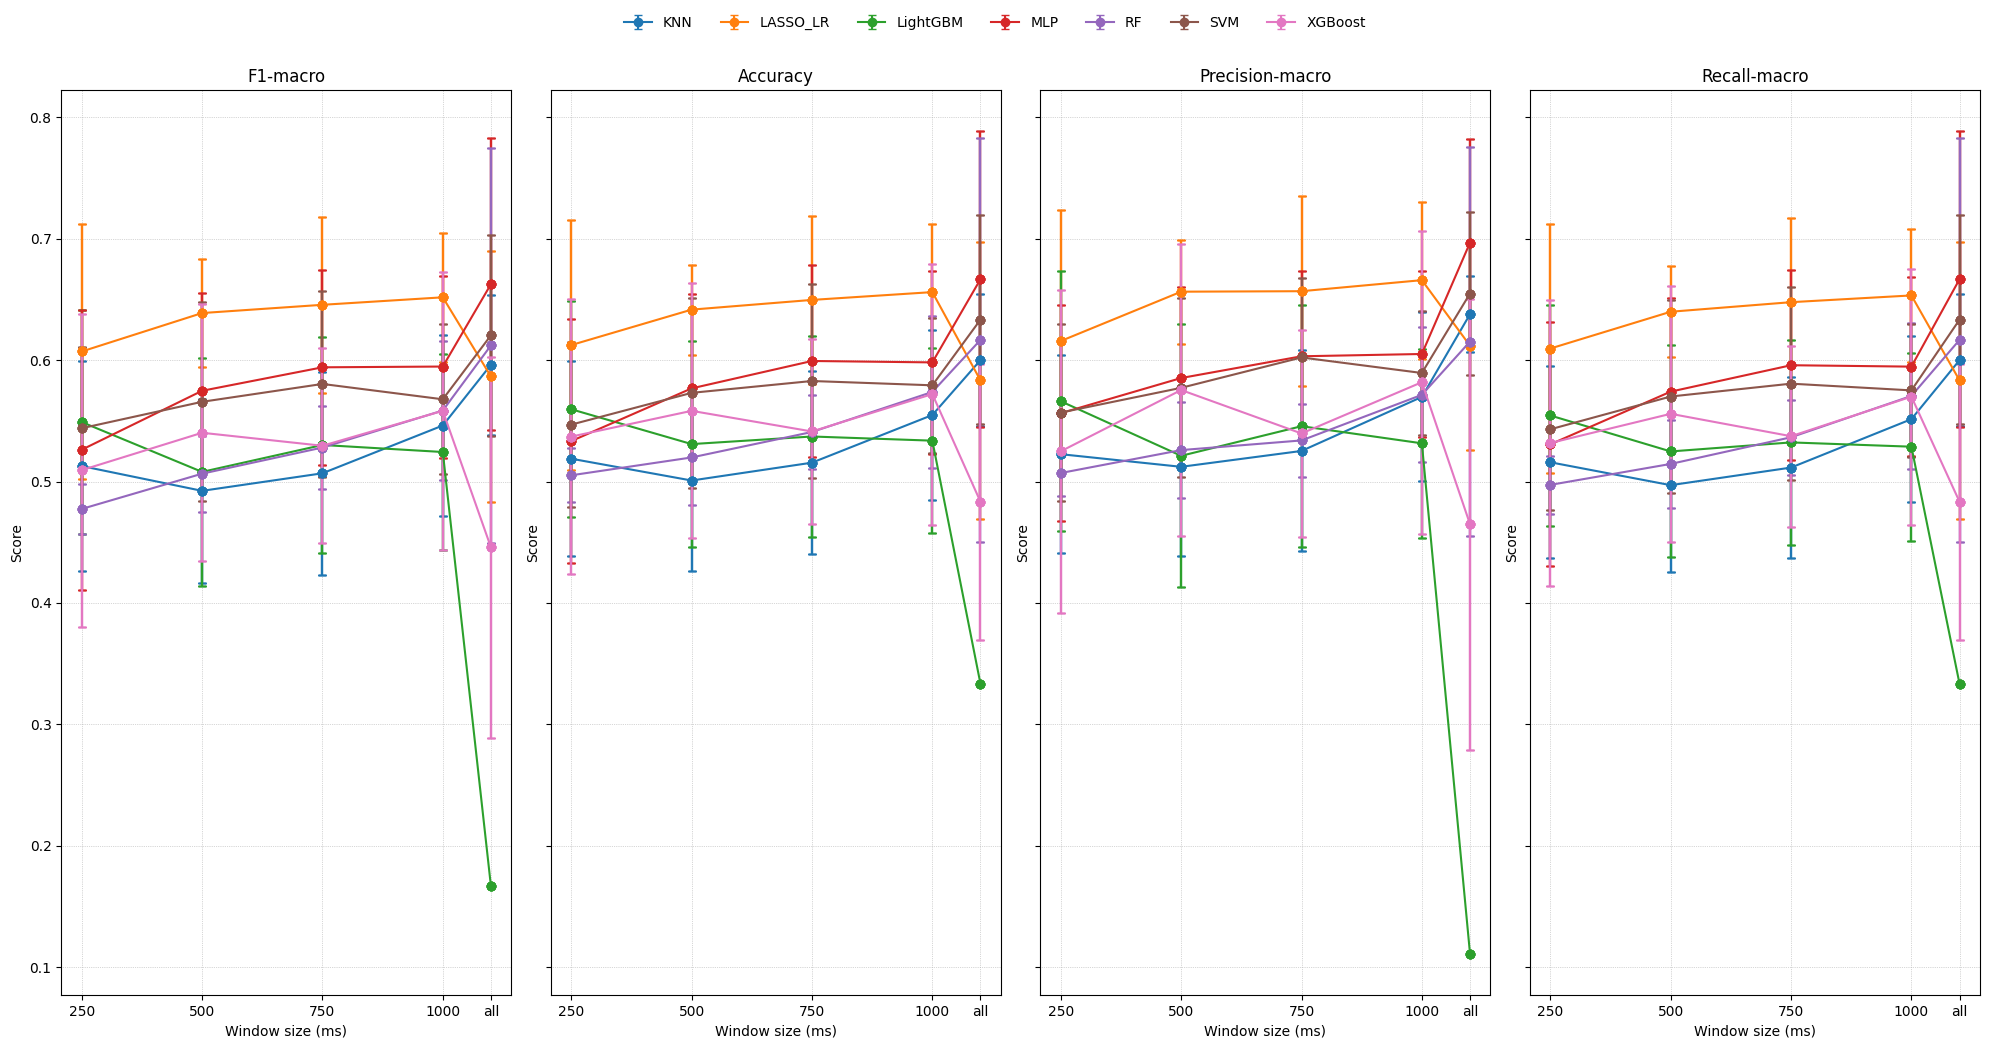

In [65]:
plot_metrics_vs_window(df_summary)

In [66]:
df_summary[df_summary["window_size"] == "1000"]

,model_name,window_size,f1_macro_mean,f1_macro_std,accuracy_mean,accuracy_std,precision_macro_mean,precision_macro_std,recall_macro_mean,recall_macro_std,params
0,KNN,1000,0.546140,0.074476,0.554775,0.069902,0.569697,0.069564,0.551372,0.068382,NaN
5,LASSO_LR,1000,0.651743,0.053288,0.656034,0.056301,0.665878,0.064756,0.653290,0.055120,NaN
10,LightGBM,1000,0.524318,0.080416,0.533661,0.076208,0.531467,0.077911,0.528695,0.077490,NaN
15,MLP,1000,0.594716,0.074954,0.598133,0.075055,0.605057,0.067997,0.594646,0.073521,NaN
20,RF,1000,0.558494,0.057414,0.573790,0.062613,0.571403,0.055498,0.570493,0.060408,NaN
25,SVM,1000,0.567736,0.061643,0.579255,0.055484,0.589400,0.051260,0.575069,0.055088,NaN
30,XGBoost,1000,0.558241,0.114552,0.572036,0.107442,0.581808,0.124629,0.569904,0.105568,NaN
35,KNN,1000,0.546140,0.074476,0.554775,0.069902,0.569697,0.069564,0.551372,0.068382,NaN
40,LASSO_LR,1000,0.651743,0.053288,0.656034,0.056301,0.665878,0.064756,0.653290,0.055120,NaN
45,LightGBM,1000,0.524318,0.080416,0.533661,0.076208,0.531467,0.077911,0.528695,0.077490,NaN


In [37]:
feature_importance = pd.read_csv(r"C:\Users\giusy\OneDrive\Desktop\AI_Healtcare\IMU-compensatory-movement-detection\Data\Models\feature_importances_all.csv")

In [38]:
feature_importance

,feature,importance,task,model,window_size
0,Quat_W_arm_l_MAX,0.001889,cup-placing,RF,1000
1,Quat_W_arm_l_MIN,0.001885,cup-placing,RF,1000
2,Quat_W_arm_l_AMP,0.000816,cup-placing,RF,1000
3,Quat_W_arm_l_MEAN,0.003904,cup-placing,RF,1000
4,Quat_W_arm_l_JERK,0.001165,cup-placing,RF,1000
...,...,...,...,...,...
118295,Mag_Z_wrist_r_DOMFREQ,0.000000,pouring,LASSO_LR,nowin
118296,Mag_Z_wrist_r_DOMPOW,0.000000,pouring,LASSO_LR,nowin
118297,Mag_Z_wrist_r_TOTPOW,0.000000,pouring,LASSO_LR,nowin
118298,Mag_Z_wrist_r_SPEC_CENT,0.000000,pouring,LASSO_LR,nowin
